In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#property_df = pd.read_excel("../Dataset/Property Purchase Complete.xlsx")
property_df = pd.read_excel(
    "../Dataset/Property Purchase Complete.xlsx",
    header=None
)

In [6]:
property_df.info()
property_df.shape
property_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   0       1048576 non-null  object        
 1   1       1048576 non-null  int64         
 2   2       1048576 non-null  datetime64[ns]
 3   3       1047905 non-null  object        
 4   4       1048576 non-null  object        
 5   5       1048576 non-null  object        
 6   6       1048576 non-null  object        
 7   7       1048538 non-null  object        
 8   8       84956 non-null    object        
 9   9       1031661 non-null  object        
 10  10      1000364 non-null  object        
 11  11      1048576 non-null  object        
 12  12      1048576 non-null  object        
 13  13      1048576 non-null  object        
 14  14      1048576 non-null  object        
 15  15      1048576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(14)
memory usag

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [12]:
property_df.columns = [
    "transaction_id",
    "price",
    "date",
    "postcode",
    "property_type",
    "old_new",
    "duration",
    "paon",
    "saon",
    "street",
    "locality",
    "town_city",
    "district",
    "county",
    "category",
    "status"
]

In [13]:
property_df["date"] = pd.to_datetime(property_df["date"])
property_df["price"] = pd.to_numeric(property_df["price"])


In [14]:
property_df.info()
property_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   transaction_id  1048576 non-null  object        
 1   price           1048576 non-null  int64         
 2   date            1048576 non-null  datetime64[ns]
 3   postcode        1047905 non-null  object        
 4   property_type   1048576 non-null  object        
 5   old_new         1048576 non-null  object        
 6   duration        1048576 non-null  object        
 7   paon            1048538 non-null  object        
 8   saon            84956 non-null    object        
 9   street          1031661 non-null  object        
 10  locality        1000364 non-null  object        
 11  town_city       1048576 non-null  object        
 12  district        1048576 non-null  object        
 13  county          1048576 non-null  object        
 14  category        10

,transaction_id,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town_city,district,county,category,status
0,{2A289E9F-6BB5-CDC8-E050-A8C063054829},36995,1995-03-24,SE19 3NF,F,N,L,CROWN POINT,14,BEULAH HILL,NaN,LONDON,CROYDON,GREATER LONDON,A,A
1,{2A289E9F-6BBA-CDC8-E050-A8C063054829},25000,1995-03-31,E16 1LG,F,N,L,9,NaN,POLLARD CLOSE,NaN,LONDON,NEWHAM,GREATER LONDON,A,A
2,{2A289E9F-6BC5-CDC8-E050-A8C063054829},25500,1995-05-17,EN3 6EA,F,N,L,33,NaN,BRIDLE CLOSE,NaN,ENFIELD,ENFIELD,GREATER LONDON,A,A
3,{2A289E9F-7DE9-CDC8-E050-A8C063054829},42000,1995-04-21,N13 4RS,T,N,L,87,NaN,RUSSELL ROAD,NaN,LONDON,ENFIELD,GREATER LONDON,A,A
4,{2A289E9F-7DF0-CDC8-E050-A8C063054829},43000,1995-06-30,RM10 7NU,T,N,F,45,NaN,BOSWORTH ROAD,NaN,DAGENHAM,BARKING AND DAGENHAM,GREATER LONDON,A,A


In [17]:
text_cols = [
    "transaction_id","postcode","property_type","old_new","duration",
    "paon","saon","street","locality","town_city",
    "district","county","category","status"
]
property_df[text_cols] = property_df[text_cols].astype("string")

In [18]:
property_df = property_df.drop(
    columns=["transaction_id","status","category"]
)

In [19]:
property_df.isna().sum()

price                 0
date                  0
postcode            671
property_type         0
old_new               0
duration              0
paon                 38
saon             963620
street            16915
locality          48212
town_city             0
district              0
county                0
dtype: int64

In [22]:
missing_values = ["postcode","paon","saon","street","locality"]
property_df[missing_values] = property_df[missing_values].fillna("")
property_df.isna().sum()

price            0
date             0
postcode         0
property_type    0
old_new          0
duration         0
paon             0
saon             0
street           0
locality         0
town_city        0
district         0
county           0
dtype: int64

In [23]:
property_df["year"] = property_df["date"].dt.year
property_df["month"] = property_df["date"].dt.month

In [27]:
property_df.describe()

,price,date,year,month
count,1.048576e+06,1048576,1.048576e+06,1.048576e+06
mean,6.882909e+04,1995-10-09 10:30:27.026367104,1.995240e+03,6.837708e+00
min,1.000000e+00,1995-01-01 00:00:00,1.995000e+03,1.000000e+00
25%,3.995000e+04,1995-05-18 00:00:00,1.995000e+03,4.000000e+00
50%,5.500000e+04,1995-09-01 00:00:00,1.995000e+03,7.000000e+00
75%,7.995000e+04,1995-12-21 00:00:00,1.995000e+03,1.000000e+01
max,5.650000e+06,1996-12-31 00:00:00,1.996000e+03,1.200000e+01
std,6.092004e+04,NaN,4.269763e-01,3.343472e+00


In [28]:
property_df.isnull().sum()

price            0
date             0
postcode         0
property_type    0
old_new          0
duration         0
paon             0
saon             0
street           0
locality         0
town_city        0
district         0
county           0
year             0
month            0
dtype: int64

In [29]:
property_df.to_csv("../Dataset/Property Purchase Complete.csv", index=False)

In [30]:
salary_df = pd.read_csv("../Dataset/Annual Survey of Hours and Earnings Resident Analysis.csv", skiprows=9)
salary_df.head()

,region,mnemonic,2002,Conf %,2003,Conf %.1,2004,Conf %.2,2005,Conf %.3,...,2021,Conf %.19,2022,Conf %.20,2023,Conf %.21,2024,Conf %.22,2025,Conf %.23
0,North East,E12000001,18075,2.0,18349,2.0,19311,2.7,20132,2.4,...,27666,2.1,29816,2.6,31435,1.8,33380,1.9,34833,1.7
1,North West,E12000002,19281,1.0,20031,1.0,20895,1.5,21923,1.5,...,29570,1.2,30883,1.4,33127,1.3,35304,1.0,37445,1.0
2,Yorkshire and The Humber,E12000003,18899,1.0,19618,1.0,20469,1.6,21493,1.5,...,28974,1.3,30531,1.6,32075,1.6,34723,1.1,35990,1.1
3,East Midlands,E12000004,19513,1.0,20245,1.0,20935,1.8,21950,1.7,...,29161,1.5,30946,1.4,32611,1.8,34834,1.3,36194,1.1
4,West Midlands,E12000005,19183,1.0,19803,1.0,20795,1.7,21570,1.4,...,29662,1.2,31416,1.8,33351,1.8,35000,1.3,37048,1.1


In [31]:
salary_df = salary_df.drop(columns=["mnemonic"], errors="ignore")


In [32]:
cols = []

for c in salary_df.columns:
    if "Conf" not in str(c):
        cols.append(c)

salary_df = salary_df[cols]

In [33]:
salary_df.head()

,region,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,North East,18075,18349,19311,20132,20431,21026,21872,22847,23184,...,25660,26046,26505,27251,27906,27666,29816,31435,33380,34833
1,North West,19281,20031,20895,21923,22052,22833,23864,24011,24291,...,26220,26660,27520,28511,29523,29570,30883,33127,35304,37445
2,Yorkshire and The Humber,18899,19618,20469,21493,21843,22381,23410,24000,23949,...,25947,26293,26894,27921,28810,28974,30531,32075,34723,35990
3,East Midlands,19513,20245,20935,21950,22187,22544,23724,24549,24453,...,26554,26556,27606,28556,29417,29161,30946,32611,34834,36194
4,West Midlands,19183,19803,20795,21570,22110,22559,23820,23942,23901,...,26270,26843,27600,28278,29485,29662,31416,33351,35000,37048


In [34]:
salary_df = salary_df[salary_df["region"] != "Column Total"]
salary_df = salary_df.dropna(subset=["region"])

In [39]:
salary_long = salary_df.melt(
    id_vars="region",
    var_name="year",
    value_name="median_salary"
)

In [40]:
salary_long.head()

,region,year,median_salary
0,North East,2002,18075
1,North West,2002,19281
2,Yorkshire and The Humber,2002,18899
3,East Midlands,2002,19513
4,West Midlands,2002,19183


In [41]:
salary_long.columns = ["region", "year", "median_salary"]

In [42]:
salary_long["year"] = salary_long["year"].astype(int)
salary_long["median_salary"] = salary_long["median_salary"].astype(float)

In [43]:
salary_long.to_csv("../Dataset/Annual Survey of Hours and Earnings Resident Analysis.csv", index=False)

In [45]:
property_df = pd.read_csv("../Dataset/Property Purchase Complete.csv")
salary_df = pd.read_csv("../Dataset/Annual Survey of Hours and Earnings Resident Analysis.csv")
property_df.head()


,price,date,postcode,property_type,old_new,duration,paon,saon,street,locality,town_city,district,county,year,month
0,36995,1995-03-24,SE19 3NF,F,N,L,CROWN POINT,14,BEULAH HILL,NaN,LONDON,CROYDON,GREATER LONDON,1995,3
1,25000,1995-03-31,E16 1LG,F,N,L,9,NaN,POLLARD CLOSE,NaN,LONDON,NEWHAM,GREATER LONDON,1995,3
2,25500,1995-05-17,EN3 6EA,F,N,L,33,NaN,BRIDLE CLOSE,NaN,ENFIELD,ENFIELD,GREATER LONDON,1995,5
3,42000,1995-04-21,N13 4RS,T,N,L,87,NaN,RUSSELL ROAD,NaN,LONDON,ENFIELD,GREATER LONDON,1995,4
4,43000,1995-06-30,RM10 7NU,T,N,F,45,NaN,BOSWORTH ROAD,NaN,DAGENHAM,BARKING AND DAGENHAM,GREATER LONDON,1995,6


In [46]:
salary_df.head()

,region,year,median_salary
0,North East,2002,18075.0
1,North West,2002,19281.0
2,Yorkshire and The Humber,2002,18899.0
3,East Midlands,2002,19513.0
4,West Midlands,2002,19183.0


In [47]:
salary_df["region"].unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'East', 'London', 'South East',
       'South West', 'Wales', 'Scotland', 'Northern Ireland', '-'],
      dtype=object)

In [48]:
property_df["district"].unique()[:10]

array(['CROYDON', 'NEWHAM', 'ENFIELD', 'BARKING AND DAGENHAM', 'BURNLEY',
       'BRADFORD', 'LAMBETH', 'MERTON', 'SOUTHWARK', 'WALTHAM FOREST'],
      dtype=object)

In [49]:
property_df["county"] = property_df["county"].str.upper().str.strip()
salary_df["region"] = salary_df["region"].str.upper().str.strip()

In [51]:
price_by_region = (
    property_df
    .groupby(["county", "year"])["price"]
    .median()
    .reset_index()
)

price_by_region.columns = ["region", "year", "median_price"]

price_by_region

,region,year,median_price
0,AVON,1995,54500.0
1,AVON,1996,50000.0
2,BATH AND NORTH EAST SOMERSET,1995,74000.0
3,BATH AND NORTH EAST SOMERSET,1996,67000.0
4,BEDFORD,1995,63500.0
...,...,...,...
259,WREKIN,1996,51500.0
260,WREXHAM,1995,46000.0
261,WREXHAM,1996,47500.0
262,YORK,1995,50000.0


In [52]:
housing_df = pd.merge(
    price_by_region,
    salary_df,
    on=["region", "year"],
    how="inner"
)

housing_df.head()

,region,year,median_price,median_salary


In [53]:
price_by_region["region"] = price_by_region["region"].str.upper().str.strip()
salary_df["region"] = salary_df["region"].str.upper().str.strip()

In [54]:
mapping = {
    "GREATER LONDON": "LONDON"
}

price_by_region["region"] = price_by_region["region"].replace(mapping)

In [55]:
housing_df = pd.merge(
    price_by_region,
    salary_df,
    on=["region", "year"],
    how="inner"
)

housing_df.head()

,region,year,median_price,median_salary


In [56]:
print(price_by_region["year"].unique()[:10])

[1995 1996]


In [57]:
print(salary_df["year"].unique()[:10])

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]


In [58]:
price_by_region["year"] = price_by_region["year"].astype(int)
salary_df["year"] = salary_df["year"].astype(int)

In [60]:
housing_df = pd.merge(
    price_by_region,
    salary_df,
    on=["region", "year"],
    how="inner"
)

housing_df.head()

,region,year,median_price,median_salary


In [61]:
print("price_by_region shape:", price_by_region.shape)
print("salary_long shape:", salary_df.shape)

price_by_region shape: (264, 3)
salary_long shape: (312, 3)


In [62]:
print("PRICE regions sample:")
print(price_by_region["region"].unique()[:10])

print("\nSALARY regions sample:")
print(salary_df["region"].unique()[:10])

print("\nPRICE years sample:")
print(price_by_region["year"].unique()[:10])

print("\nSALARY years sample:")
print(salary_df["year"].unique()[:10])

PRICE regions sample:
['AVON' 'BATH AND NORTH EAST SOMERSET' 'BEDFORD' 'BEDFORDSHIRE'
 'BERKSHIRE' 'BLACKBURN WITH DARWEN' 'BLACKPOOL' 'BLAENAU GWENT'
 'BOURNEMOUTH' 'BOURNEMOUTH, CHRISTCHURCH AND POOLE']

SALARY regions sample:
['NORTH EAST' 'NORTH WEST' 'YORKSHIRE AND THE HUMBER' 'EAST MIDLANDS'
 'WEST MIDLANDS' 'EAST' 'LONDON' 'SOUTH EAST' 'SOUTH WEST' 'WALES']

PRICE years sample:
[1995 1996]

SALARY years sample:
[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]


In [63]:
hpi = pd.read_csv("../Dataset/UK House Price Index Nov 2025.csv")
hpi.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,84638,41.1,NaN,NaN,NaN,NaN,388.0,...,112843.0,40.7,NaN,NaN,103.0,81273.0,41.0,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,84623,41.1,NaN,0.0,NaN,NaN,326.0,...,113061.0,40.8,0.2,NaN,107.0,81194.0,40.9,-0.1,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,86536,42.1,NaN,2.3,NaN,NaN,453.0,...,115218.0,41.6,1.9,NaN,140.0,83137.0,41.9,2.4,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,87373,42.5,NaN,1.0,NaN,NaN,571.0,...,115247.0,41.6,0.0,NaN,180.0,84241.0,42.5,1.3,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,89493,43.5,NaN,2.4,NaN,NaN,502.0,...,117377.0,42.4,1.8,NaN,167.0,86466.0,43.6,2.6,NaN,335.0


In [64]:
hpi = hpi[["Date", "RegionName", "AveragePrice"]]

In [65]:
hpi["Date"] = pd.to_datetime(hpi["Date"])
hpi["year"] = hpi["Date"].dt.year

In [66]:
hpi.head()

,Date,RegionName,AveragePrice,year
0,2004-01-01,Aberdeenshire,84638,2004
1,2004-01-02,Aberdeenshire,84623,2004
2,2004-01-03,Aberdeenshire,86536,2004
3,2004-01-04,Aberdeenshire,87373,2004
4,2004-01-05,Aberdeenshire,89493,2004


In [67]:
price_by_region = (
    hpi
    .groupby(["RegionName", "year"])["AveragePrice"]
    .median()
    .reset_index()
)

price_by_region.head()

,RegionName,year,AveragePrice
0,Aberdeenshire,2004,94443.0
1,Aberdeenshire,2005,111449.0
2,Aberdeenshire,2006,133922.0
3,Aberdeenshire,2007,169655.5
4,Aberdeenshire,2008,179423.0


In [68]:
price_by_region = price_by_region.rename(columns={
    "RegionName": "region",
    "AveragePrice": "median_price"
})

price_by_region["region"] = price_by_region["region"].str.upper()

In [69]:
housing_df = pd.merge(
    price_by_region,
    salary_df,
    on=["region", "year"],
    how="inner"
)

housing_df.head()

,region,year,median_price,median_salary
0,EAST MIDLANDS,2002,83164.0,19513.0
1,EAST MIDLANDS,2003,106517.0,20245.0
2,EAST MIDLANDS,2004,127389.5,20935.0
3,EAST MIDLANDS,2005,135574.0,21950.0
4,EAST MIDLANDS,2006,141902.0,22187.0


In [70]:
housing_df

,region,year,median_price,median_salary
0,EAST MIDLANDS,2002,83164.0,19513.0
1,EAST MIDLANDS,2003,106517.0,20245.0
2,EAST MIDLANDS,2004,127389.5,20935.0
3,EAST MIDLANDS,2005,135574.0,21950.0
4,EAST MIDLANDS,2006,141902.0,22187.0
...,...,...,...,...
259,YORKSHIRE AND THE HUMBER,2021,173243.0,28974.0
260,YORKSHIRE AND THE HUMBER,2022,192582.5,30531.0
261,YORKSHIRE AND THE HUMBER,2023,193054.0,32075.0
262,YORKSHIRE AND THE HUMBER,2024,197975.0,34723.0


In [72]:
housing_df["affordability_ratio"] = (
    housing_df["median_price"] / housing_df["median_salary"]
)

In [74]:
housing_df

,region,year,median_price,median_salary,affordability_ratio
0,EAST MIDLANDS,2002,83164.0,19513.0,4.261979
1,EAST MIDLANDS,2003,106517.0,20245.0,5.261398
2,EAST MIDLANDS,2004,127389.5,20935.0,6.085001
3,EAST MIDLANDS,2005,135574.0,21950.0,6.176492
4,EAST MIDLANDS,2006,141902.0,22187.0,6.395727
...,...,...,...,...,...
259,YORKSHIRE AND THE HUMBER,2021,173243.0,28974.0,5.979257
260,YORKSHIRE AND THE HUMBER,2022,192582.5,30531.0,6.307769
261,YORKSHIRE AND THE HUMBER,2023,193054.0,32075.0,6.018831
262,YORKSHIRE AND THE HUMBER,2024,197975.0,34723.0,5.701552


In [75]:
housing_df["salary_growth_pct"] = (
    housing_df.groupby("region")["median_salary"]
    .pct_change() * 100
)

In [76]:
housing_df

,region,year,median_price,median_salary,affordability_ratio,salary_growth_pct
0,EAST MIDLANDS,2002,83164.0,19513.0,4.261979,NaN
1,EAST MIDLANDS,2003,106517.0,20245.0,5.261398,3.751345
2,EAST MIDLANDS,2004,127389.5,20935.0,6.085001,3.408249
3,EAST MIDLANDS,2005,135574.0,21950.0,6.176492,4.848340
4,EAST MIDLANDS,2006,141902.0,22187.0,6.395727,1.079727
...,...,...,...,...,...,...
259,YORKSHIRE AND THE HUMBER,2021,173243.0,28974.0,5.979257,0.569247
260,YORKSHIRE AND THE HUMBER,2022,192582.5,30531.0,6.307769,5.373783
261,YORKSHIRE AND THE HUMBER,2023,193054.0,32075.0,6.018831,5.057155
262,YORKSHIRE AND THE HUMBER,2024,197975.0,34723.0,5.701552,8.255651


In [77]:
housing_df["price_growth_pct"] = (
    housing_df.groupby("region")["median_price"]
    .pct_change() * 100
)

In [78]:
housing_df

,region,year,median_price,median_salary,affordability_ratio,salary_growth_pct,price_growth_pct
0,EAST MIDLANDS,2002,83164.0,19513.0,4.261979,NaN,NaN
1,EAST MIDLANDS,2003,106517.0,20245.0,5.261398,3.751345,28.080660
2,EAST MIDLANDS,2004,127389.5,20935.0,6.085001,3.408249,19.595464
3,EAST MIDLANDS,2005,135574.0,21950.0,6.176492,4.848340,6.424784
4,EAST MIDLANDS,2006,141902.0,22187.0,6.395727,1.079727,4.667562
...,...,...,...,...,...,...,...
259,YORKSHIRE AND THE HUMBER,2021,173243.0,28974.0,5.979257,0.569247,9.337448
260,YORKSHIRE AND THE HUMBER,2022,192582.5,30531.0,6.307769,5.373783,11.163222
261,YORKSHIRE AND THE HUMBER,2023,193054.0,32075.0,6.018831,5.057155,0.244830
262,YORKSHIRE AND THE HUMBER,2024,197975.0,34723.0,5.701552,8.255651,2.549028


In [79]:
import sqlite3

conn = sqlite3.connect("housing_project.db")

In [85]:
price_by_region.to_sql("prices", conn, if_exists="replace", index=False)
salary_df.to_sql("salaries", conn, if_exists="replace", index=False)

312

In [86]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,prices
1,salaries


In [87]:
query = """
SELECT
    p.region,
    p.year,
    p.median_price,
    s.median_salary,
    (p.median_price * 1.0 / s.median_salary) AS affordability_ratio
FROM prices p
JOIN salaries s
    ON p.region = s.region
    AND p.year = s.year
"""

sql_df = pd.read_sql(query, conn)

In [88]:
sql_df.head()

,region,year,median_price,median_salary,affordability_ratio
0,EAST MIDLANDS,2002,83164.0,19513.0,4.261979
1,EAST MIDLANDS,2003,106517.0,20245.0,5.261398
2,EAST MIDLANDS,2004,127389.5,20935.0,6.085001
3,EAST MIDLANDS,2005,135574.0,21950.0,6.176492
4,EAST MIDLANDS,2006,141902.0,22187.0,6.395727


In [89]:
housing_df

,region,year,median_price,median_salary,affordability_ratio,salary_growth_pct,price_growth_pct
0,EAST MIDLANDS,2002,83164.0,19513.0,4.261979,NaN,NaN
1,EAST MIDLANDS,2003,106517.0,20245.0,5.261398,3.751345,28.080660
2,EAST MIDLANDS,2004,127389.5,20935.0,6.085001,3.408249,19.595464
3,EAST MIDLANDS,2005,135574.0,21950.0,6.176492,4.848340,6.424784
4,EAST MIDLANDS,2006,141902.0,22187.0,6.395727,1.079727,4.667562
...,...,...,...,...,...,...,...
259,YORKSHIRE AND THE HUMBER,2021,173243.0,28974.0,5.979257,0.569247,9.337448
260,YORKSHIRE AND THE HUMBER,2022,192582.5,30531.0,6.307769,5.373783,11.163222
261,YORKSHIRE AND THE HUMBER,2023,193054.0,32075.0,6.018831,5.057155,0.244830
262,YORKSHIRE AND THE HUMBER,2024,197975.0,34723.0,5.701552,8.255651,2.549028


In [91]:
housing_df.isna().sum()

region                  0
year                    0
median_price            0
median_salary           0
affordability_ratio     0
salary_growth_pct      11
price_growth_pct       11
dtype: int64

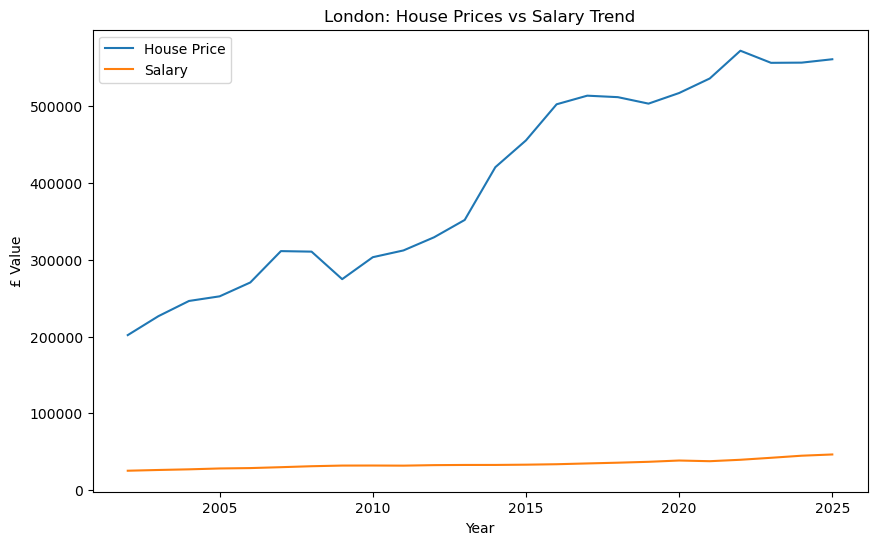

In [93]:
region_df = housing_df[housing_df["region"] == "LONDON"]

plt.figure(figsize=(10,6))

plt.plot(region_df["year"], region_df["median_price"], label="House Price")
plt.plot(region_df["year"], region_df["median_salary"], label="Salary")

plt.xlabel("Year")
plt.ylabel("£ Value")
plt.title("London: House Prices vs Salary Trend")

plt.legend()
plt.show()

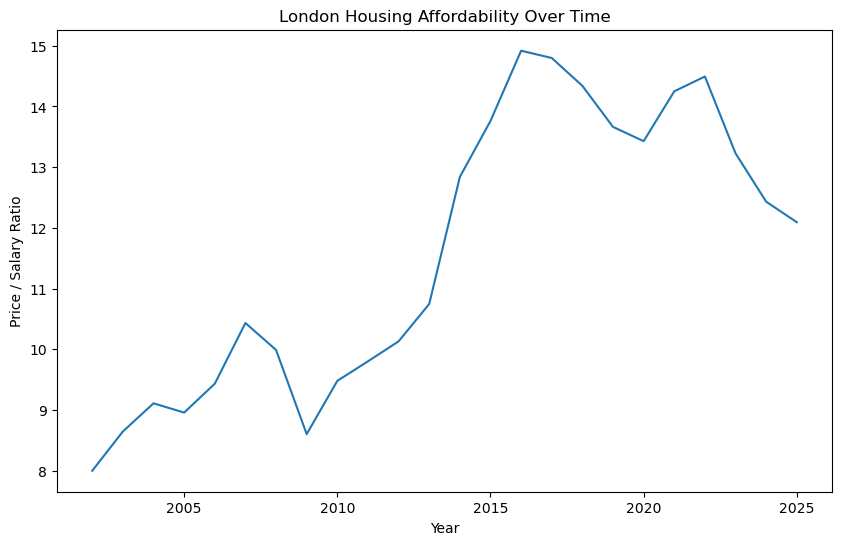

In [95]:

region_df = housing_df[housing_df["region"] == "LONDON"]

plt.figure(figsize=(10,6))

plt.plot(region_df["year"], region_df["affordability_ratio"])

plt.xlabel("Year")
plt.ylabel("Price / Salary Ratio")
plt.title("London Housing Affordability Over Time")

plt.show()

In [96]:
housing_df["region"].unique()


array(['EAST MIDLANDS', 'LONDON', 'NORTH EAST', 'NORTH WEST',
       'NORTHERN IRELAND', 'SCOTLAND', 'SOUTH EAST', 'SOUTH WEST',
       'WALES', 'WEST MIDLANDS', 'YORKSHIRE AND THE HUMBER'], dtype=object)

In [107]:
pivot_df = housing_df.pivot(
    index="year",
    columns="region",
    values="affordability_ratio"
)

pivot_df.head()

region,EAST MIDLANDS,LONDON,NORTH EAST,NORTH WEST,NORTHERN IRELAND,SCOTLAND,SOUTH EAST,SOUTH WEST,WALES,WEST MIDLANDS,YORKSHIRE AND THE HUMBER
year,,,,,,,,,,,
2002,4.261979,8.001050,3.252089,3.361003,4.486330,3.168655,6.656534,6.218847,3.581690,4.087969,3.464892
2003,5.261398,8.647342,4.166385,3.981529,4.727462,3.369954,7.449742,7.197962,4.290457,5.013357,4.238251
2004,6.085001,9.110774,5.291337,5.059847,4.978315,4.342350,7.892652,7.992190,5.414453,5.708367,5.234623
2005,6.176492,8.958636,5.636350,5.445058,5.646760,4.861334,7.959622,7.993839,5.797790,5.918312,5.568208
2006,6.395727,9.433766,5.997871,5.866656,6.945232,5.205121,8.186468,8.254145,6.196597,6.076798,5.923202


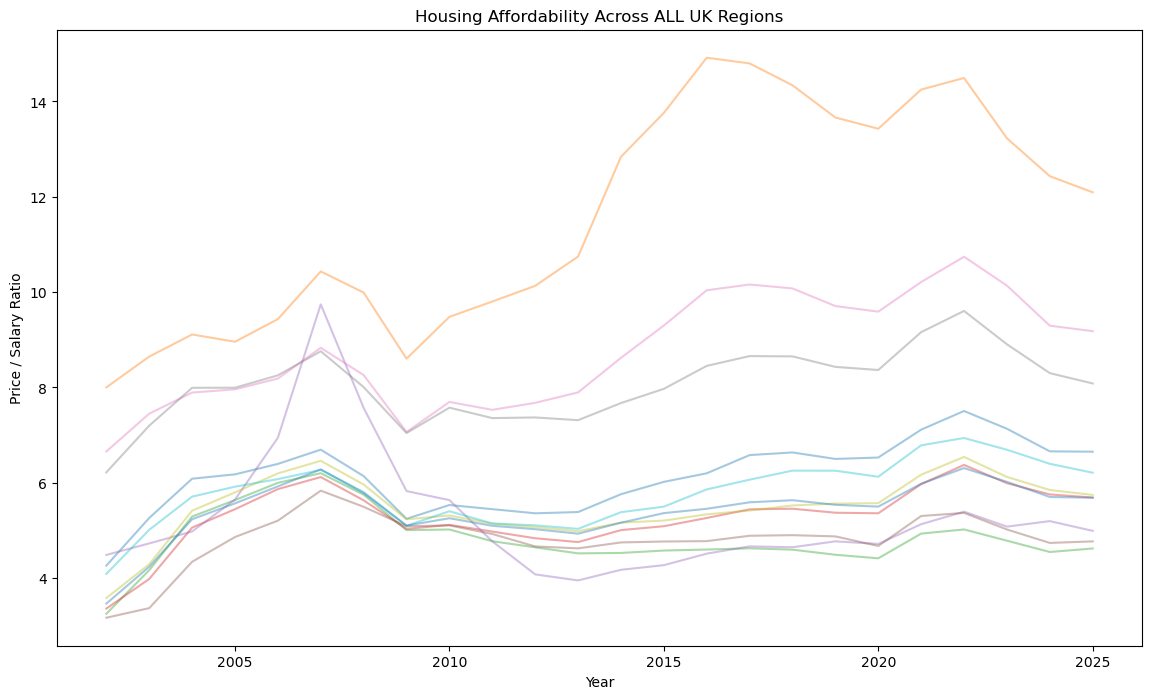

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], alpha=0.4)

plt.xlabel("Year")
plt.ylabel("Price / Salary Ratio")
plt.title("Housing Affordability Across ALL UK Regions")

plt.show()

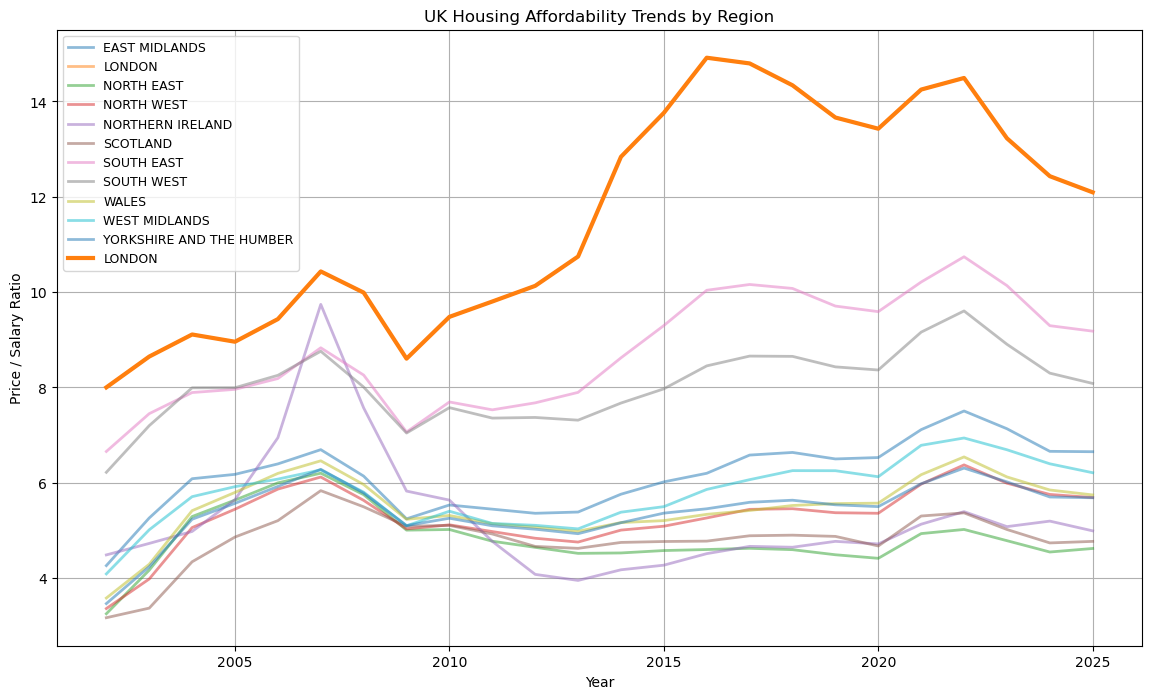

In [115]:
plt.figure(figsize=(14,8))

for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], linewidth=2, alpha=0.5, label=col)

# highlight London
plt.plot(pivot_df.index, pivot_df["LONDON"], linewidth=3, label="LONDON")

plt.xlabel("Year")
plt.ylabel("Price / Salary Ratio")
plt.title("UK Housing Affordability Trends by Region")
plt.legend(fontsize=9)

plt.grid(True)
plt.show()

In [116]:
housing_df

,region,year,median_price,median_salary,affordability_ratio,salary_growth_pct,price_growth_pct
0,EAST MIDLANDS,2002,83164.0,19513.0,4.261979,NaN,NaN
1,EAST MIDLANDS,2003,106517.0,20245.0,5.261398,3.751345,28.080660
2,EAST MIDLANDS,2004,127389.5,20935.0,6.085001,3.408249,19.595464
3,EAST MIDLANDS,2005,135574.0,21950.0,6.176492,4.848340,6.424784
4,EAST MIDLANDS,2006,141902.0,22187.0,6.395727,1.079727,4.667562
...,...,...,...,...,...,...,...
259,YORKSHIRE AND THE HUMBER,2021,173243.0,28974.0,5.979257,0.569247,9.337448
260,YORKSHIRE AND THE HUMBER,2022,192582.5,30531.0,6.307769,5.373783,11.163222
261,YORKSHIRE AND THE HUMBER,2023,193054.0,32075.0,6.018831,5.057155,0.244830
262,YORKSHIRE AND THE HUMBER,2024,197975.0,34723.0,5.701552,8.255651,2.549028


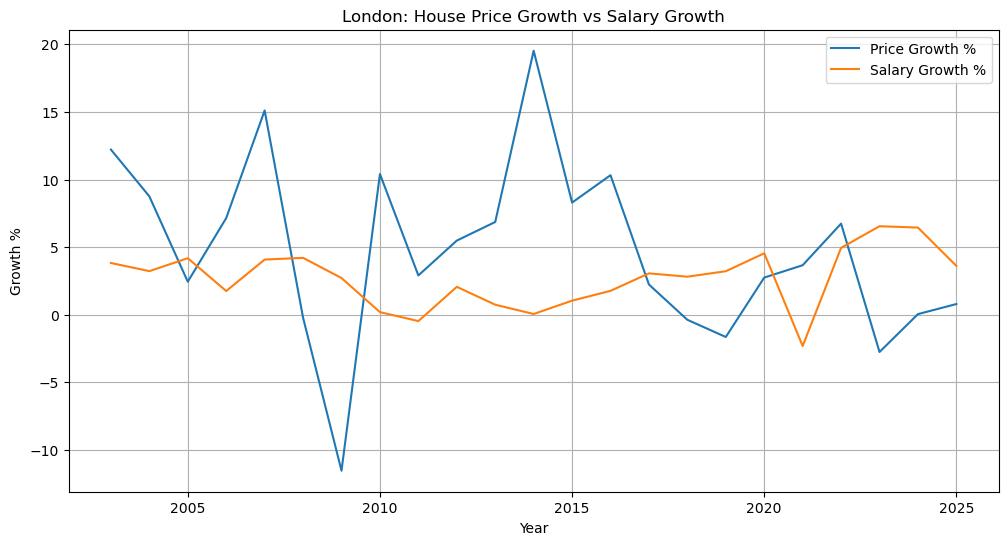

In [118]:
region_df = housing_df[housing_df["region"] == "LONDON"]

plt.figure(figsize=(12,6))

plt.plot(region_df["year"], region_df["price_growth_pct"], label="Price Growth %")
plt.plot(region_df["year"], region_df["salary_growth_pct"], label="Salary Growth %")
plt.legend()
plt.title("London: House Price Growth vs Salary Growth")
plt.xlabel("Year")
plt.ylabel("Growth %")

plt.grid(True)
plt.show()

In [119]:
growth_summary = (
    housing_df
    .groupby("region")[["price_growth_pct", "salary_growth_pct"]]
    .mean()
    .reset_index()
)

growth_summary.sort_values("price_growth_pct", ascending=False).head()

,region,price_growth_pct,salary_growth_pct
3,NORTH WEST,5.644360,2.949379
8,WALES,5.485929,3.017728
5,SCOTLAND,5.395782,3.272485
10,YORKSHIRE AND THE HUMBER,5.393310,2.860029
9,WEST MIDLANDS,5.040295,2.922175


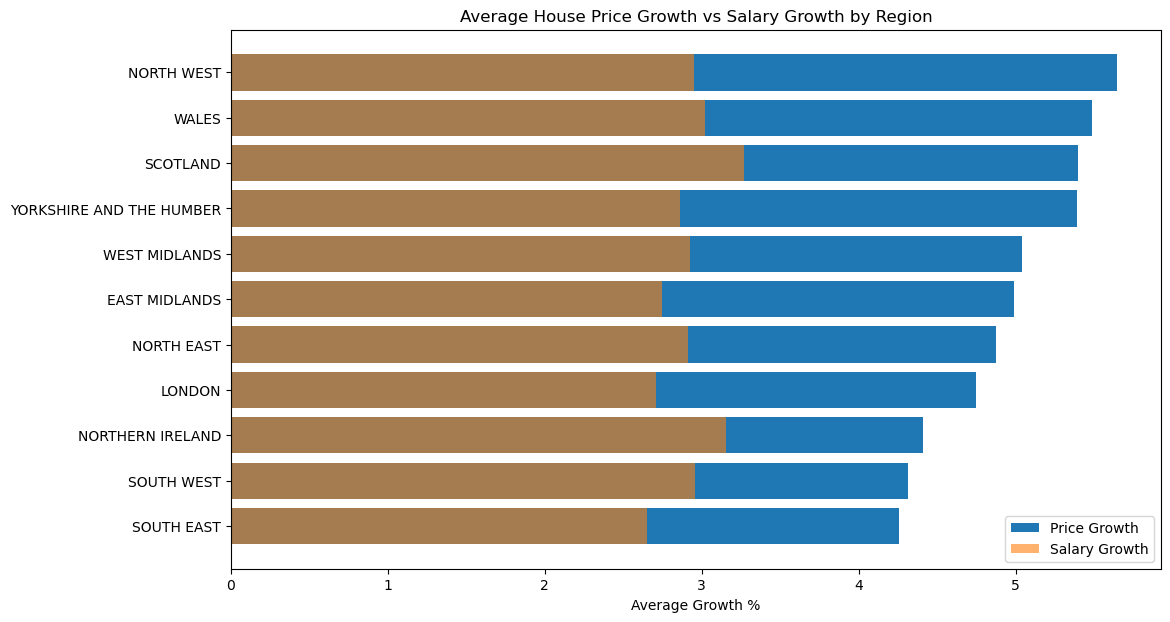

In [120]:
import matplotlib.pyplot as plt

growth_summary = growth_summary.sort_values("price_growth_pct")

plt.figure(figsize=(12,7))

plt.barh(growth_summary["region"], growth_summary["price_growth_pct"], label="Price Growth")
plt.barh(growth_summary["region"], growth_summary["salary_growth_pct"], alpha=0.6, label="Salary Growth")

plt.xlabel("Average Growth %")
plt.title("Average House Price Growth vs Salary Growth by Region")
plt.legend()

plt.show()

In [121]:
housing_df.to_csv("housing_final.csv", index=False)